# Derin Öğrenme Uygulama

 #### <B>Kaynak:</B> https://tirendazakademi.medium.com/keras-i%CC%87le-yapay-si%CC%87ni%CC%87r-a%C4%9Flari-fb6b3e72070f

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

In [4]:
from tensorflow import keras
keras.__version__

'2.8.0'

<B>Fashion MNIST</B> veri setini import edelim. Fashion MNIST veri seti, el yazısı rakamlarının bulunduğu klasik MNIST veri setine benzer ama biraz daha kompleks bir veri setidir. Fashion MNIST veri seti, 10 sınıf ve 70,000 örneklemden oluşuyor. Her örneklem gri tonlamalı ve 28*28 boyutlarındadır.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [7]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Eğitim veri setinin bir kısmını validasyon set olarak ayıralım. Veri setini parçalarken ayrıca <b>ölçeklendirelim</b>.

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [9]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Veri seti 10 sınıftan oluşuyordu. Bu sınıflara isim atamak için bir değişken oluşturalım.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

İkinci resmin etiketini ekrana yazdıralım.

In [11]:
class_names[y_train[1]]

'T-shirt/top'

Öncelikle Sequential modeli oluşturalım.

In [12]:
model = keras.models.Sequential()

Ardından ilk katmanı modele ekleyelim. Bu katman ile girdi görüntüsü bir boyutlu diziye dönüşür. Bu katmana Flatten katman denir. Bu katmanda sadece veri ön işleme yapılır.

In [13]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

- Şimdi 300 nöronluk bir Dense gizli katman ekleyelim.
- Bir katmandaki bütün nöronlar bir önceki katmandaki bütün nöronlara bağlanırsa buna Dense ya da tam bağlantılı katman denir.
- Aktivasyon fonksiyon olarak ReLU kullanalım.

In [14]:
model.add(keras.layers.Dense(300, activation="relu"))

Dana sonra 100 nöronluk bir Dense gizli katman daha ekleyelim ve yine ReLU aktivasyon fonksiyonunu kullanalım.

In [15]:
model.add(keras.layers.Dense(100, activation="relu"))

En son 10 sınıfımız olduğu için 10 nöronluk bir Dense çıktı katmanı ekleyelim ve aktivasyon fonksiyon olarak softmax kullanalım.

In [16]:
model.add(keras.layers.Dense(10, activation="softmax"))

Böylece bir sinir ağı modelini kurmuş olduk. summary() metodunu kullanarak inşa ettiğimiz modelin özetini görebiliriz.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Özetteki birinci katman Flatten ve 784 şeklinde. Diğer üç katman Dense katman. Tabloda her bir katmanın parametre sayısı, output ve shape değerleri gösteriliyor. Output’taki None değerinin anlamı batch size’ın herhangi bir değer olabileceğini ifade eder. Özetin son kısmında toplam parametre sayısı, eğitilebilen parametre sayısı ve eğitilemeyen parametre sayısı gösteriliyor.

Dense katmanda çok sayıda parametre vardır. Örneğin ilk gizli katmanda 784*300 bağlantı ağırlıkları ve artı 300 bias terimi yani toplamda 235.500 parametre vardır. Parametrenin çok olması modelin eğitim verilerine iyi uymasını sağlar. Fakat eğitim verilerine iyi uyan modelde ezberleme problemi ortaya çıkabilir.

### Model Compile
Model mimarsini inşa ettikten sonra compile() metodunu çağırarak kullanacağımız loss fonksiyonunu ve optimize ediciyi belirleyelim. Ayrıca eğitim ve değerlendirme aşamasında hesap edilecek metriği yazalım.

Herbir örnekte 0'dan 9'a sınıf indekslerimiz olduğu için loss olarak “sparse_categorical_crossentropy” kullandık. one-hot kodlama gibi herbir örnek için sınıf başına hedef olasılığımız olsaydı “categorical_crossentropy” loss kullanmamız gerekecekti.
İkili sınıflandırma yapıyor olsaydık, çıkış katmanında “softmax” aktivasyon fonksiyonu yerine “sigmoid” aktivasyon fonksiyonunu ve “binary_crossentropy” loss kullanırdık.

Optimize edici argümanına “sgd” yazdık. “sgd” basit Stokastik Gradyan İniş (Stochastic Gradient Descent) tekniğini ifade eder. 

In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Model Kurma ve Değerlendirme
Şimdiye kadar sinir ağını inşa ettik ve derledik. Artık fit() metodonu çağırarak modeli kurabiliriz. fit() metoduna eğitim girdi, eğitim çıktı, epochs sayısı ve validasyon verilerini yazıyoruz.

In [19]:
history = model.fit(X_train, y_train, 
                    epochs=5,
                    validation_data=(X_valid, y_valid)
                   )

Epoch 1/5
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7224 - accuracy: 0.7619 - val_loss: 0.5031 - val_accuracy: 0.8294
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4912 - accuracy: 0.8279 - val_loss: 0.4408 - val_accuracy: 0.8518
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4446 - accuracy: 0.8430 - val_loss: 0.5261 - val_accuracy: 0.7962
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4191 - accuracy: 0.8521 - val_loss: 0.4009 - val_accuracy: 0.8616
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3982 - accuracy: 0.8606 - val_loss: 0.3873 - val_accuracy: 0.8702


Eğitim verilerindeki doğruluğu yüksek ama validasyon verilerindeki doğruluk düşükse modelde ezberleme problemi var demektir. 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

fit() metodu bir history nesnesi döndürür. Bu nesnenin history niteliği (history.history), sözlük yapısındadır. Bu sözlük, eğitim set ve validasyon setteki herbir devrin sonunda hesaplanan loss ve metrikleri içerir. Bu sözlüğü kullanarak öğrenme eğrisinin grafiğini görebiliriz.

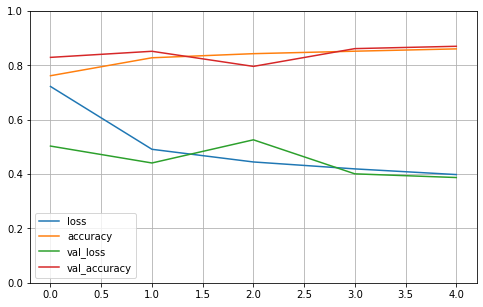

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 72.5451 - accuracy: 0.8260


[72.54512786865234, 0.8259999752044678]

In [23]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 5.493156e-22, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred;

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [26]:
import numpy as np
np.array(class_names)[y_pred]


IndexError: arrays used as indices must be of integer (or boolean) type

In [95]:
y_new = y_test[:5]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')